# Section-1
# Document Clustering

## Name-Komal , Student-id -33275440

### Task-1--- Write mathematical formulations of the optimization functions of maximum likelihood estimation (MLE) for the document clustering model with complete data and incomplete data, respectively. Then briefly describe why MLE with incomplete data is hard to optimize.

## Complete Data 
 When all cluster labels $z_{nk}$ are known for documents, the likelihood function for the complete data scenario can be defined. In this case, the complete data includes both the documents D and their corresponding cluster assignments Z.

### Likelihood for Complete Data -It is the probability of observing the documents D and their cluster assignments $Z$, given the model parameters $\phi_k$ and $\mu_{wk}$:


### $P(D,Z|\phi,\mu) = \prod_{n=1}^{N} \prod_{k=1}^{K} \left( \phi_k \prod_{w \in A} \mu_{wk}^{c(w, d_n)} \right)^{z_{nk}}
$

### $\phi_k$ is the prior probability of the k-th cluster.

### $\mu_{wk}$ is the probability of the w-th word occurring in the k-th cluster.

### $c(w, d_n)$ is the count of word w in document d_n.

### $z_{nk}$ is 1 if d_n is in cluster k ,otherwise 0.



### Applying the natural logarithm to the likelihood function, you get the log-likelihood function:

 $\ell(\phi, \mu) = \log \left( \prod_{n=1}^{N} \prod_{k=1}^{K} \left( \phi_k \prod_{w \in A} \mu_{wk}^{c(w, d_n)} \right)^{z_{nk}} \right)$

### The logarithm of a product rule (log(ab)=loga+logb) lets us simplify:


$\ell(\phi, \mu) = \sum_{n=1}^{N} \sum_{k=1}^{K} z_{nk} \log \left( \phi_k \prod_{w \in A} \mu_{wk}^{c(w, d_n)} \right)$


### again,
$\ell(\phi, \mu) = \sum_{n=1}^{N} \sum_{k=1}^{K} z_{nk} \left( \log \phi_k + \log \left( \prod_{w \in A} \mu_{wk}^{c(w, d_n)} \right) \right)$

### Log-Likelihood for Complete Data is givcen as:

### $\ell(\phi, \mu) = \sum_{n=1}^{N} \sum_{k=1}^{K} z_{nk} \left( \log \phi_k + \sum_{w \in A} c(w, d_n) \log \mu_{wk} \right)
$

## Incomplete Data 
For incomplete data, the true cluster assignments Z are unknown, making them latent variables. The likelihood function now integrates over all possible values of Z, reflecting all potential cluster assignments:

### $P(D|\phi, \mu) = \sum_{Z} P(D,Z|\phi, \mu)$

### $P(D|\phi, \mu) = \sum_{Z} \prod_{n=1}^{N} \prod_{k=1}^{K} \left( \phi_k \prod_{w \in A} \mu_{wk}^{c(w, d_n)} \right)^{z_{nk}}$

### The log-likelihood for incomplete data would theoretically be:

### $\ell(\phi, \mu) = \log \left( \sum_{Z} \prod_{n=1}^{N} \prod_{k=1}^{K} \left( \phi_k \prod_{w \in A} \mu_{wk}^{c(w, d_n)} \right)^{z_{nk}} \right)$

## Why MLE with Incomplete Data is Hard to Optimize

 Optimizing MLE with incomplete data is difficult because we don't have direct access to all the information needed—specifically, the cluster assignments of each document are unknown. This lack of complete data introduces uncertainty into the model, making the likelihood function depend on latent variables (the unknown cluster assignments). 

- Latent Variables: The true cluster assignments are unknown for Incomplete Data, requiring summation over all possible configurations, which is computationally infeasible for large datasetsdue to the exponential number of combinations as the number of documents and clusters grows.

- The number of possible combinations of cluster assignments grows exponentially with the number of documents.

- No Closed-Form Solution: The likelihood function involves the log of sums, which cannot be simplified into an easy-to-maximize form.The likelihood function may have multiple local maxima.


Necessity of Iterative Algorithms: Methods like the Expectation-Maximization (EM) algorithm are needed to approximate solutions.


## – Briefly explain the high-level idea of the EM algorithm to find MLE parameter estimates.


* The Expectation-Maximization (EM) algorithm is a powerful tool for finding the Maximum Likelihood Estimates (MLE) of parameters in statistical models, especially when the model involves latent variables.It decouples the hard problem of direct likelihood maximization into simpler, manageable optimization problems solved iteratively.

### Idea two main steps:

* Expectation Step (E-step)
    The E-step estimates the probabilities of the latent variables based on the current parameters. In document clustering, these latent variables are the cluster assignments of each document which are not observed directly. The EM algorithm calculates the "responsibility" that each cluster has for each document. This responsibility represents the probability that a given document belongs to a particular cluster under the current model parameters. 

* Maximization Step (M-step)
    Once the responsibilities are computed, the M-step updates the model parameters to maximize the likelihood of the observed data given these new estimated probabilities of cluster assignments. The aim is to find parameter values that maximize the likelihood of the observed data, making the observed documents as likely as possible under the model with the newly estimated parameters.


* The EM algorithm alternates between these two steps, gradually improving the parameter estimates with each iteration.The process repeats until the changes in the likelihood are minimal or other convergence criteria are met.

### Conclusion
This iterative refinement makes the EM algorithm particularly effective for complex models with latent variables, where direct computation of MLE is not feasible. By decomposing the problem into simpler estimation steps, the EM algorithm converges to a set of parameters that are likely to be close to the true MLE, even in the presence of unobserved data.


#### (from week-7,8 notes)

# Part-II

# Expectation and Maximization steps of the (soft)-EM algorithm

### Let's derive the Expectation (E-step) and Maximization (M-step) steps for the EM algorithm used in document clustering


## Expectation Step (E-step)
-The E-step involves calculating the posterior probabilities, or responsibilities, that a particular document 
d_n belongs to cluster k, given the current parameter estimates.

E-step: estimate the distributions of hidden variables to get the tight lower bound function (Q function)

$r(z_{nk}) = p(z_n = k \mid d_n, \theta^{\text{old}})$ 

where $p(z_n = k)$ is equivalent to $p((z_{nk})=1)$

The responsibility formula is given as 
$\gamma(z_{nk}) = \frac{\phi_k \prod_{w \in A} \mu_{wk}^{c(w,d_n)}}{\sum_{j=1}^{K} \phi_j \prod_{w \in A} \mu_{wj}^{c(w,d_n)}}$


$\phi_k$ is the prior probability of the k-th cluster.

$\mu_{wk}$ is the probability of the w-th word occurring in the k-th cluster.

$c(w, d_n)$is the count of word w in document d_n.

The denominator normalizes the probabilities across all clusters.



## Maximization Step (M-step)
After computing the responsibilities in the E-step, the M-step updates the model parameters to maximize the expected complete log-likelihood of the observed data given the current responsibilities.

### $Q(\theta, \theta^{\text{old}}) := \sum_{n=1}^{N} \sum_{k=1}^{K} p(z_{nk} = 1 \mid d_n, \theta^{\text{old}}) \log p(z_{nk} = 1, d_n \mid \theta)$

 $= \sum_{n=1}^{N} \sum_{k=1}^{K} \gamma(z_{nk}) \log \left( \phi_k \prod_{w \in A} \mu_{kw}^{c(w, d_n)} \right)
\$


 $=\sum_{n=1}^{N} \sum_{k=1}^{K} \gamma(z_{nk}) \left( \log \phi_k + \log \prod_{w \in A} \mu_{kw}^{c(w, d_n)} \right)$

 $= \sum_{n=1}^{N} \sum_{k=1}^{K} \gamma(z_{nk}) \left( \log \phi_k + \sum_{w \in A} c(w, d_n) \log \mu_{kw} \right)$



### Updating the Cluster Priors $\phi_k$

### where $\phi_k = \frac{1}{N} \sum_{n=1}^{N} r(z_{nk})$

### $\phi_k = \frac{N_k}{N} \quad \text{where} \quad N_k = \sum_{n=1}^{N} \gamma(z_{nk})$


### Updating the Word Probabilities $μ_{wk}$  


$\mu_{kw} = \frac{\sum_{n=1}^{N} r(z_{nk}) c(w, d_n)}{\sum_{w' \in A} \sum_{n=1}^{N} r(z_{nk}) c(w', d_n)}
\$

#### These updates are derived by setting the derivatives of $Q$ with respect to $\phi_k$ and $\mu_{wk}$ to zero, subject to the constraints that $\sum_{k=1}^{K} \phi_k = 1$ and $\sum_{w \in A} \mu_{wk} = 1$ for all $k$.

### Updating parameters-

#### Choose an initialization for the parameters $\theta^0 = (\phi^0, \mu_1^0, \ldots, \mu_K^0)$ where $\theta^0$ and $\mu^0$ are initial guesses for the cluster priors and word probabilities in each cluster, respectively.

While the convergence is not met, perform the following steps:

Increment the iteration count:

$t \leftarrow t + 1$:

#### E-step: Calculate the responsibilities (posterior probabilities) for each document and cluster based on the current parameter estimates:
Obtain $\forall n, \forall k : r(z_{nk})$ based on $\theta^t$

### $r(z_{nk}) = \gamma(z_{nk}) = \frac{\phi_k^t \prod_{w \in A} (\mu_{wk}^t)^{c(w, d_n)}}{\sum_{j=1}^{K} \phi_j^t \prod_{w \in A} (\mu_{wj}^t)^{c(w, d_n)}}$

#### M-step: Obtain $\theta^{t+1}$ by solving MLE for the expected complete-data log likelihood

$\theta^{t+1} = \arg \max_{\theta} Q(\theta, \theta^t)$

$\phi_k^{t+1} = \frac{N_k}{N} \quad \text{where} \quad N_k = \sum_{n=1}^{N} \gamma(z_{nk})$

### $\mu_{kw}^{t+1} = \frac{\sum_{n=1}^{N} \gamma(z_{nk}) c(w, d_n)}{\sum_{w' \in A} \sum_{n=1}^{N} \gamma(z_{nk}) c(w', d_n)}$

 Here, $N_k$ is the effective number of documents estimated to be in cluster $k$.

#### Algorithm continues until the changes in the parameters θ between successive iterations are minimal or satisfy a pre-defined threshold.

# Part-III

Load Task2A.txt file

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt


In [2]:
with open('Task2A.txt', 'r') as file:
    text = file.readlines()
all([length == 2 for length in [len(line.split('\t')) for line in text]])
labels, articles = [line.split('\t')[0].strip() for line in text], [line.split('\t')[1].strip() for line in text]
docs = pd.DataFrame(data = zip(labels,articles), columns=['label', 'article'])
docs.label = docs.label.astype('category')
print("",docs.head(20))
print("Shape",docs.shape)
#ACTIVITY-4.2

         label                                            article
0   sci.crypt  ripem frequently asked questions archive name ...
1   sci.crypt  ripem frequently asked questions archive name ...
2   sci.crypt  ripem frequently noted vulnerabilities archive...
3   sci.crypt  certifying authority question answered if you ...
4   sci.crypt  rubber hose cryptanalysis some sick part of me...
5   sci.crypt  declassifying media there are many urban legen...
6   sci.crypt  re hard drive security for fbi targets from re...
7   sci.crypt  re disk safety measure begin pgp signed messag...
8   sci.crypt  re pgp general comments neuhaus vier informati...
9   sci.crypt  licensing this thread brings up the more gener...
10  sci.crypt  re licensing of public key implementations wit...
11  sci.crypt  re identifying securing files in article bb f ...
12  sci.crypt  lga ncrypt source i got a number of requests f...
13  sci.crypt  re illegal wiretaps was denning s trust in art...
14  sci.crypt  re licens

# Part-IV
### Implement the EM algorithm 

In [3]:
# Define the class for Document Clustering EM
class DocumentClusteringEM:
    def __init__(self, K, tau_max=200, epsilon=0.01, random_state=132):
        self.K = K               # number of clusters
        self.tau_max = tau_max   # max number of iterations
        self.epsilon = epsilon   # minimum acceptable error rate
        self.random_state = random_state
        np.random.seed(self.random_state)
        
        

    def fit(self, X, verbose=False):
        N, V = X.shape  # N is the number of documents, V is the vocabulary size
        ## initialization:
        self.Psi_hat_ = np.array([1/self.K] * self.K)  # assuming all clusters have the same prob initially
        self.Nk_hat_ = self.Psi_hat_ * N                                       
        self.Mu_hat_ = X[np.random.choice(N, size=self.K, replace=False)] + 1e-10  # avoid zero probabilities
        self.Mu_hat_ /= self.Mu_hat_.sum(axis=1, keepdims=True)  # normalize word probabilities
        r = np.zeros((N, self.K))  # empty posterior matrix (the membership estimates will be stored here)                
        
        self.Mu_hat_historic_ = np.zeros(shape=(list(self.Mu_hat_.shape) + [self.tau_max]))
        self.r_historic_ = np.zeros(shape=(N, self.K, self.tau_max))

        terminate = False
        tau = 0
        Mu_hat_old = self.Mu_hat_  # Mu_hat_old is used to store the last iteration value for mu_hat
        
        while not terminate:
            
           
            # E-step: Compute responsibilities, or posterior probabilities, indicating the probability
            # of each document belonging to each cluster. This uses current estimates of cluster parameters.
            log_r = np.zeros((N, self.K))  # log responsibilities
            for k in range(self.K):
                log_r[:, k] = np.log(self.Psi_hat_[k] + 1e-10) + (X @ np.log(self.Mu_hat_[k] + 1e-10))
            
            
            # Log-sum-exp normalization
            # We use the log-sum-exp trick to stabilize the computation by preventing numerical underflow/overflow.
            max_log_r = np.max(log_r, axis=1, keepdims=True)
            log_r = log_r - max_log_r
            r = np.exp(log_r)
            r /= r.sum(axis=1, keepdims=True)
            self.r_historic_[:, :, tau] = r

            
            # M-step: Update the parameters of each cluster (cluster priors and word distributions) based
            # on the newly computed responsibilities. This maximizes the expected log-likelihood of the observed data
            # given these responsibilities.
            self.Nk_hat_ = r.sum(axis=0)
            self.Psi_hat_ = self.Nk_hat_ / N
            self.Mu_hat_ = (r.T @ X) + 1e-10  # avoid zero probabilities
            self.Mu_hat_ /= self.Mu_hat_.sum(axis=1, keepdims=True)
            self.Mu_hat_historic_[:, :, tau] = self.Mu_hat_

            
            # increase iteration counter
            tau += 1

            
            # check termination condition
            terminate = (tau == self.tau_max) or np.allclose(self.Mu_hat_, Mu_hat_old, rtol=self.epsilon)
            Mu_hat_old = self.Mu_hat_

        self.Mu_hat_historic_ = self.Mu_hat_historic_[:, :, :tau]
        self.r_historic_ = self.r_historic_[:, :, :tau]

        if verbose: print(f'Converged in {tau} iterations')

        return self

    def predict_proba(self, x): #Predict the probabilities of document x belonging to each cluster.
        N = x.shape[0]
        log_r = np.zeros((N, self.K))
        for k in range(self.K):
            log_r[:, k] = np.log(self.Psi_hat_[k] + 1e-10) + (x @ np.log(self.Mu_hat_[k] + 1e-10))
        
        max_log_r = np.max(log_r, axis=1, keepdims=True)
        log_r = log_r - max_log_r
        r = np.exp(log_r)
        r /= r.sum(axis=1, keepdims=True)
        # return a numpy array, shape (N, K), containing the probabilities of each document belonging to each cluster.
        return r

    def predict(self, x):
        #Predict the cluster labels for document x.
        probs = self.predict_proba(x)
        preds = np.argmax(probs, axis=1)
        #return numpy array, shape (N,), containing the predicted cluster labels for each document.
        return preds

#Activity 4.2 and 4.1


# Part-V

In [4]:
articles = docs['article'].values

# Feature Extraction
tfidf = TfidfVectorizer(stop_words='english', max_features=1000, norm='l2')

# Transform articles to feature matrix
# Converting to dense array here
features = tfidf.fit_transform(articles).toarray()

# Clustering Algorithms

# k=4 hard Clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)

# k=4 soft Clustering
gmm = GaussianMixture(n_components=4, random_state=42)


In [5]:
# Fit Models
kmeans_labels = kmeans.fit_predict(features)
gmm_labels = gmm.fit_predict(features)


### Performing a PCA on the clusterings and then plotting  obtained clusters where x and y axes are the first two principal components.

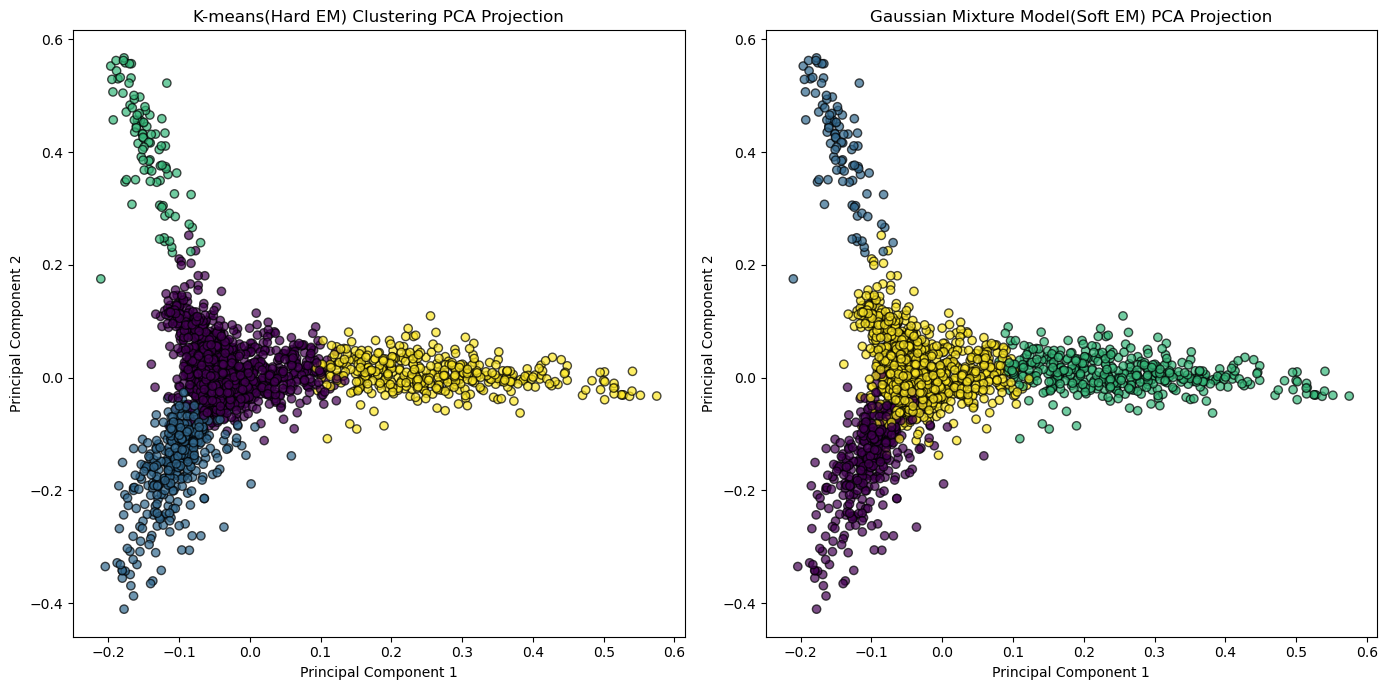

In [6]:
#activity 4.1
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(features)

# Plotting
plt.figure(figsize=(14, 7))

# K-means clustering results
plt.subplot(1, 2, 1)
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=kmeans_labels, cmap='viridis', edgecolor='k', alpha=0.7)
plt.title('K-means(Hard EM) Clustering PCA Projection')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Gaussian Mixture Model clustering results
plt.subplot(1, 2, 2)
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=gmm_labels, cmap='viridis', edgecolor='k', alpha=0.7)
plt.title('Gaussian Mixture Model(Soft EM) PCA Projection')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()

### Discuss how and why the hard and soft clustering are different

### Hard EM (K-means Clustering)  
* The K-means algorithm, a type of hard clustering, assigns each data point to exactly one cluster, leading to distinct, non-overlapping clusters in the PCA projection. In the plot, we observe clear boundaries between clusters, with each cluster centered around a centroid.This method effectively captures the dominant structure if the clusters are spherical and well-separated but can oversimplify the data structure when real-world complexities such as overlapping distributions or non-spherical shapes arise. The clusters appear as visually distinct groups primarily because K-means minimizes the variance within each cluster, striving to create homogeneous groups that are as compact as possible.

### Soft EM (Gaussian Mixture Models Clustering) 
* A Gaussian Mixture Models (GMM) utilize a probabilistic model to assign memberships, allowing for soft clustering. This means each data point in the PCA projection is associated with clusters to varying degrees of probability, which often results in more fluid and overlapping clusters. 

* From the Soft EM plot, it's noticeable that clusters are less rigidly defined, with more gradual transitions between different clusters.The clusters in the GMM plot are denser at their centers, where the probability of belonging to the cluster is higher, and become less dense as the probability decreases.
* GMM's ability to consider the covariance within the data allows it to adapt to the shape and orientation of clusters, unlike K-means, which assumes isotropic clusters.



### Summary-
* The comparison between K-means and Gaussian Mixture Models as seen in the PCA plots highlights the distinct approaches each algorithm takes to cluster data. Hard clustering, creates clear and concise clusters, making it ideal for datasets where the clusters are distinct and well-separated. However, it lacks flexibility in cluster shape and soft boundary definition, which Gaussian Mixture Models address with their probabilistic approach. GMM allows for overlapping clusters and accommodates various data distributions, providing a more nuanced understanding of the data structure. 
* This analysis, based on the PCA projections illustrates that the choice between K-means and GMM should be guided by the nature of the dataset and the specific requirements of the analysis, balancing between simplicity and capturing data complexity.